# Procesando datos en Python
## Taller de Data Science

### Instituto Data Science, Universidad del Desarrollo

* Prof. Diego Caro (dcaro en el dominio udd.cl).
* Prof. Eduardo Graells-Garrido (egraells en el dominio udd.cl).

https://twitter.com/diegocaro
https://twitter.com/carnby

https://github.com/diegocaro/tallerds

# Esta clase

![pandas](http://pandas.pydata.org/_static/pandas_logo.png)

* Cruzando datasets: operación JOIN
* Agregación de datos
* Tablas pivote
* Manejo de strings
* Manejo de tiempo


Esta presentación basada en el trabajo de Jake VanDerPlas https://github.com/jakevdp/PythonDataScienceHandbook. Bajo licencia CC0.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

# Cruzando datasets

* Cruzar datasets separados en varios Dataframes.
    * Para quienes sepan SQL: equivalente a la operación **JOIN**.
* Los Dataframes deben compartir datos en una columna.

In [3]:
info = pd.DataFrame({'comuna_id': [1, 2, 3, 4],
                    'SuperficieKm2': [49924.1, 221.6, 22, 99],
                    'Poblacion': [21327, 227768, 237369, 289949]     })
comunas = pd.DataFrame({'Comuna': [ 'Concepción','Natales', 'Santiago', 'Las Condes'],
                    'comuna_id': [2, 1, 3, 4]})

In [4]:
display('info', 'comunas') 

info
   Poblacion  SuperficieKm2  comuna_id
0      21327        49924.1          1
1     227768          221.6          2
2     237369           22.0          3
3     289949           99.0          4

comunas
       Comuna  comuna_id
0  Concepción          2
1     Natales          1
2    Santiago          3
3  Las Condes          4

* Ambos Dataframes comparte la columna **comuna_id**

In [5]:
pd.merge(info, comunas, on = 'comuna_id') # on es el nombre de la columna común

,Poblacion,SuperficieKm2,comuna_id,Comuna
0,21327,49924.1,1,Natales
1,227768,221.6,2,Concepción
2,237369,22.0,3,Santiago
3,289949,99.0,4,Las Condes


In [6]:
pd.merge(info, comunas, on = 'comuna_id').drop('comuna_id', axis='columns')

,Poblacion,SuperficieKm2,Comuna
0,21327,49924.1,Natales
1,227768,221.6,Concepción
2,237369,22.0,Santiago
3,289949,99.0,Las Condes


# Inner JOIN (intersección)

* Retorna filas cuyos valores están en ambos dataframes.
![inner](images/innerjoin.gif)

In [10]:
df1 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'fav_food': ['fish', 'beans', 'bread']})
df2 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'fav_drink': ['wine', 'beer']})

In [11]:
display('df1', 'df2', 'pd.merge(df1, df2, on="name", how="inner")')

df1
  fav_food   name
0     fish  Peter
1    beans   Paul
2    bread   Mary

df2
  fav_drink    name
0      wine    Mary
1      beer  Joseph

pd.merge(df1, df2, on="name", how="inner")
  fav_food  name fav_drink
0    bread  Mary      wine

In [12]:
set(df1.name) & set(df2.name) # intersección

{'Mary'}

## Left Join:
* Retornal filas que solo están en el dataframe de la izquierda.
    * Las filas que no contengan elementos en la derecha se completan con null (o NaN).

![inner](images/leftjoin.gif)

In [13]:
display('df1', 'df2', "pd.merge(df1, df2, on='name', how='left')")

df1
  fav_food   name
0     fish  Peter
1    beans   Paul
2    bread   Mary

df2
  fav_drink    name
0      wine    Mary
1      beer  Joseph

pd.merge(df1, df2, on='name', how='left')
  fav_food   name fav_drink
0     fish  Peter       NaN
1    beans   Paul       NaN
2    bread   Mary      wine

## Outer Join (unión):

* Retorna todas las filas con la unión de elementos de la izquierda y la derecha.
    * Los filas que no contienen elementos que calcen se completan con null.
    
![outer](images/fulljoin.gif)

In [14]:
display('df1', 'df2', "pd.merge(df1, df2, on='name', how='outer')")

df1
  fav_food   name
0     fish  Peter
1    beans   Paul
2    bread   Mary

df2
  fav_drink    name
0      wine    Mary
1      beer  Joseph

pd.merge(df1, df2, on='name', how='outer')
  fav_food    name fav_drink
0     fish   Peter       NaN
1    beans    Paul       NaN
2    bread    Mary      wine
3      NaN  Joseph      beer

Ejercicio:
* ¿Cuántas personas aparecen en nuestros datasets?


In [15]:
pd.merge(df1, df2, on='name', how='outer')['name']

0     Peter
1      Paul
2      Mary
3    Joseph
Name: name, dtype: object

* ¿Quiénes tienen comidas y bebidas favoritas?

In [16]:
pd.merge(df1, df2, on='name', how='inner')['name']

0    Mary
Name: name, dtype: object

## Cardinalidad

* El dataframe de la derecha puede contener varias filas para un valor en la columna común.
* La operación Join devuelve tantas filas como el número de veces que aparece la clave en el dataframe de la derecha.

In [17]:
department = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
skills = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})

In [18]:
display('department', 'skills', "pd.merge(department, skills, on='group', how='inner')")

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets


# Groupby

* Permite agrupar filas que comparten el mismo valor en una columna (o varias columnas!).
* Por cada grupo se puede realizar alguna operación de agregación.
* Ejemplo: sumar la columna **data** para las filas con el mismo valor en **key**
![Split-Apply-Combine](https://github.com/jakevdp/PythonDataScienceHandbook/raw/058289a6a8a544d2bc144ba0226d6ef27986e4e0/notebooks/figures/03.08-split-apply-combine.png)

In [22]:
df = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue', 'Andrew', 'Joan'],
                   'department': ['Accounting', 'Engineering', 'Engineering', 'HR', 'HR', 'HR'],
                   'salary':[1000, 5400, 4100, 3200, 4400 ,4900]})

* La función ``.groupby()`` separa las filas en grupos y calcula información agregada.
* Ejemplo: ¿Cuál es el sueldo promedio por departamento?

In [23]:
display('df',"df.groupby('department').mean()")

df
    department    name  salary
0   Accounting     Bob    1000
1  Engineering    Jake    5400
2  Engineering    Lisa    4100
3           HR     Sue    3200
4           HR  Andrew    4400
5           HR    Joan    4900

df.groupby('department').mean()
                  salary
department              
Accounting   1000.000000
Engineering  4750.000000
HR           4166.666667

* También podríamos hacerlo así:

In [24]:
for department, group in df.groupby('department'):
    print('Sueldo promedio de', department, 'es', group.salary.mean())

Sueldo promedio de Accounting es 1000.0
Sueldo promedio de Engineering es 4750.0
Sueldo promedio de HR es 4166.666666666667


Con el método `.agg( )` podemos ejecutar alguna función diseñada por nosotros. La función recibe como input la columna de las filas agregadas:

In [25]:
def mi_funcion(serie):
    # recibe como parámetro una columna del dataframe
    return np.sum(serie)
df.groupby('department')['salary'].agg(mi_funcion)

department
Accounting      1000
Engineering     9500
HR             12500
Name: salary, dtype: int64

# Pivot tables

* Las tablas pivotes permiten calcular resúmenes de los datos en un dataframe.
* La idea es calcular una agregación sobre datos que comparten el mismo valor en dos columnas distintas del dataframe.
    * Cada fila de la tabla pivote contiene los valores posibles en una columna de interés.
    * Cada columna de la tabla, los de otra columna.
* Las celdas de la tabla pivote contienen un valor agregado para las filas que tienen el mismo valor en ambas columnas.

In [26]:
import seaborn as sns # Seaborn es un módulo para graficar datos
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Pregunta: ¿Cuál es el número de supervivientes por sexo y tipo de clase?

In [27]:
titanic.pivot_table('survived', index='sex', columns='class', aggfunc=np.sum)

class,First,Second,Third
sex,,,
female,91,70,72
male,45,17,47


In [28]:
titanic[((titanic['survived'] == 1) & 
         (titanic['sex'] == 'female') & 
         (titanic['class'] == 'First') )].shape[0]

91

* Con el parámetro ``margins=True`` pueden obtener la suma de elementos en cada celda.

In [29]:
titanic.pivot_table('survived', index='sex', columns='class', aggfunc=np.sum, margins=True)

class,First,Second,Third,All
sex,,,,
female,91,70,72,233
male,45,17,47,109
All,136,87,119,342


In [30]:
(titanic[(titanic['survived'] == 1) &(titanic['sex'] == 'female') & (titanic['class'] == 'First')].shape[0] + 
 titanic[(titanic['survived'] == 1) &(titanic['sex'] == 'female') & (titanic['class'] == 'Second')].shape[0] +
 titanic[(titanic['survived'] == 1) &(titanic['sex'] == 'female') & (titanic['class'] == 'Third')].shape[0] +
 titanic[(titanic['survived'] == 1) &(titanic['sex'] == 'male') & (titanic['class'] == 'First')].shape[0] +
 titanic[(titanic['survived'] == 1) &(titanic['sex'] == 'male') & (titanic['class'] == 'Second')].shape[0] + 
 titanic[(titanic['survived'] == 1) &(titanic['sex'] == 'male') & (titanic['class'] == 'Third')].shape[0])

342

Pregunta: ¿Cuál es la tasa de supervivencia por sexo y tipo de clase?

In [31]:
titanic.pivot_table('survived', index='sex', columns='class', aggfunc=np.mean)

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Pregunta: ¿Cuál es el número de supervivientes por edad (mayor y menor de 18), sexo y tipo de clase?

In [32]:
# dividimos la edad en dos grupos, mayores y menores de 18
# pd.cut divide una serie en grupos
age = pd.cut(titanic['age'], [0, 18, 100], labels=['child','adult']) 
age.head()

0    adult
1    adult
2    adult
3    adult
4    adult
Name: age, dtype: category
Categories (2, object): [child < adult]

In [33]:
titanic.pivot_table('survived', index=['sex', age], columns='class', aggfunc=np.mean)

class            First    Second     Third
sex    age                                
female child  0.909091  1.000000  0.511628
       adult  0.972973  0.900000  0.423729
male   child  0.800000  0.600000  0.215686
       adult  0.375000  0.071429  0.133663

# Procesamiento de texto


In [34]:
names = pd.Series(['loreto', 'Diego', 'LEo', 'eDU', 'Coty'])
names

0    loreto
1     Diego
2       LEo
3       eDU
4      Coty
dtype: object

### Selección

In [35]:
names.str.contains('o') 

0     True
1     True
2     True
3    False
4     True
dtype: bool

In [36]:
names[names.str.contains('o')]

0    loreto
1     Diego
2       LEo
4      Coty
dtype: object

In [37]:
names[names.str.startswith('D')]

1    Diego
dtype: object

### Cambiar capitalización

In [38]:
names.str.capitalize() #.lower() a minusculas, .upper() a mayusculas

0    Loreto
1     Diego
2       Leo
3       Edu
4      Coty
dtype: object

### Obtener substrings

In [39]:
names.str[:3]

0    lor
1    Die
2    LEo
3    eDU
4    Cot
dtype: object

### Eliminar espacios

In [40]:
namesbad = pd.Series(['   jack', 'jill ', ' jesse ', 'frank'])
namesbad

0       jack
1      jill 
2     jesse 
3      frank
dtype: object

In [41]:
namesbad.str.strip()

0     jack
1     jill
2    jesse
3    frank
dtype: object

### Reemplazo de substrings

In [42]:
s = pd.Series(['Alexis_Sanchez', 'Francisca_Varela', 'Hola_Mundo_Bueno','f_g_h'])

In [43]:
s.str.replace('_','---')

0        Alexis---Sanchez
1      Francisca---Varela
2    Hola---Mundo---Bueno
3               f---g---h
dtype: object

In [44]:
s.str.replace('_','')

0      AlexisSanchez
1    FranciscaVarela
2     HolaMundoBueno
3                fgh
dtype: object

In [45]:
s.str.split('_')

0       [Alexis, Sanchez]
1     [Francisca, Varela]
2    [Hola, Mundo, Bueno]
3               [f, g, h]
dtype: object

In [46]:
s.str.split('_',expand=True)[1] # recupera solo el string en la posicion 1

0    Sanchez
1     Varela
2      Mundo
3          g
Name: 1, dtype: object

Más información sobre strings en Pandas: https://pandas.pydata.org/pandas-docs/stable/text.html 

# Fechas y tiempo en Pandas

### Timestamp y DatetimeIndex

In [50]:
pd.Timestamp('8/20/2017 8:21PM')

Timestamp('2017-08-20 20:21:00')

In [51]:
pd.to_datetime(['8/20/2017 8:21PM', '8/21/2017 8:20AM'])

DatetimeIndex(['2017-08-20 20:21:00', '2017-08-21 08:20:00'], dtype='datetime64[ns]', freq=None)

### Timedeltas

In [48]:
pd.Timestamp('9/3/2016')-pd.Timestamp('September 1, 2016')

Timedelta('2 days 00:00:00')

In [49]:
pd.Timestamp('9/3/2016') + pd.to_timedelta('90 days')

Timestamp('2016-12-02 00:00:00')

### Trabajando con fechas

In [53]:
dates = pd.date_range('12-19-2016', periods=10, freq='9D') # 10 periodos, cada 9 dias
dates

DatetimeIndex(['2016-12-19', '2016-12-28', '2017-01-06', '2017-01-15',
               '2017-01-24', '2017-02-02', '2017-02-11', '2017-02-20',
               '2017-03-01', '2017-03-10'],
              dtype='datetime64[ns]', freq='9D')

In [54]:
dates.weekday_name

Index(['Monday', 'Wednesday', 'Friday', 'Sunday', 'Tuesday', 'Thursday',
       'Saturday', 'Monday', 'Wednesday', 'Friday'],
      dtype='object')

### Selección

In [55]:
df = pd.DataFrame({'ganancia': 80 + np.random.randint(-5, 10, 10).cumsum(),
                  'ingreso': 120 + np.random.randint(-5, 10, 10)},
                 index=dates)
df

,ganancia,ingreso
2016-12-19,86,119
2016-12-28,81,119
2017-01-06,80,124
2017-01-15,86,129
2017-01-24,90,128
2017-02-02,99,116
2017-02-11,108,124
2017-02-20,112,128
2017-03-01,110,129
2017-03-10,118,128


In [56]:
df['2016']

,ganancia,ingreso
2016-12-19,86,119
2016-12-28,81,119


In [57]:
df['2017-03']

,ganancia,ingreso
2017-03-01,110,129
2017-03-10,118,128


### Resample
Agrupa las fechas por período, y calcula alguna agregación.

Pregunta: ¿Cuál es el promedio mensual de ganancias e ingresos?

In [58]:
df.resample('m').mean()

,ganancia,ingreso
2016-12-31,83.500000,119.000000
2017-01-31,85.333333,127.000000
2017-02-28,106.333333,122.666667
2017-03-31,114.000000,128.500000


Pregunta: ¿Cuál es el promedio semanal?

In [59]:
df.resample('W').mean()

,ganancia,ingreso
2016-12-25,86.0,119.0
2017-01-01,81.0,119.0
2017-01-08,80.0,124.0
2017-01-15,86.0,129.0
2017-01-22,NaN,NaN
2017-01-29,90.0,128.0
2017-02-05,99.0,116.0
2017-02-12,108.0,124.0
2017-02-19,NaN,NaN
2017-02-26,112.0,128.0


In [60]:
df.asfreq('W', method='ffill') #podemos reemplazar valores nulos

,ganancia,ingreso
2016-12-25,86,119
2017-01-01,81,119
2017-01-08,80,124
2017-01-15,86,129
2017-01-22,86,129
2017-01-29,90,128
2017-02-05,99,116
2017-02-12,108,124
2017-02-19,108,124
2017-02-26,112,128


### Graficar series temporales

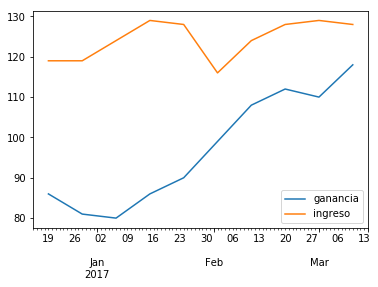

In [61]:
df.plot()

Más sobre fechas y tiempo en Pandas: https://pandas.pydata.org/pandas-docs/stable/timeseries.html

# Referencias

* Documentación Pandas https://pandas.pydata.org/pandas-docs/stable/
* Python Data Science Handbook, Jake VanderPlas https://github.com/jakevdp/PythonDataScienceHandbook

# 🎉🎉🎉

Para los ejemplos usaremos esta función que permite crear data frames artificiales. Serán útiles para explicar lo que sigue:

In [ ]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))

# Concatenando Dataframes

Con el método `.concat()` podemos concatenar dos Dataframes:

In [ ]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
display('df1', 'df2', 'pd.concat([df1, df2])')

In [ ]:
df1.append([df2,df2])

# Algunos tips con GroupBy
Puedes utlizar una clave compuesta para dividir un dataset:

In [62]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                'key2' : ['one', 'two', 'one', 'two', 'one'],
                'data1' : np.random.randn(5), 'data2' : np.random.randn(5)})
df.groupby(['key1','key2']).agg({'data1':np.sum, 'data2':np.mean})

data1     data2
key1 key2                    
a    one   0.346672  0.230411
     two   0.561350 -1.285921
b    one  -1.636378 -0.634458
     two   1.381390 -0.068471

## Transformar datos

Convertir a matriz utilizando claves compuestas y unstack().

In [67]:
df.groupby(['key1','key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

In [68]:
df.groupby(['key1','key2']).size().unstack()

key2,one,two
key1,,
a,2,1
b,1,1


## Acelerar computación
La función groupby es útil con datasets grandes, ahorra tiempo de computación. También la uso para enviar cada grupo a un procesador.

In [77]:
# un poco artificial el ejemplo, pero ayuda a demostrar la idea

gini_df = pd.read_csv('gini_by_year_clean.csv',names=['pais','anio','gini'], skiprows=2)
big_gini_df = pd.concat([gini_df]*100)
big_gini_df.shape # numero de filas y columnas

(126700, 3)

In [80]:
%%time
total_by_country = []
for pais in big_gini_df.pais.unique():
    total_by_country.append( (pais, len(big_gini_df[big_gini_df.pais == pais])) )
total_by_country[:5]

CPU times: user 1.69 s, sys: 11.9 ms, total: 1.7 s
Wall time: 1.71 s


In [81]:
%%time
total_by_country = []
for pais,group in big_gini_df.groupby('pais'):
    total_by_country.append( (pais, len(group)) )
total_by_country[:5]

CPU times: user 30.8 ms, sys: 2.79 ms, total: 33.6 ms
Wall time: 32.3 ms
